# <h1 style="color:Orange; font-size: 50px;">Unearthening Alien life </h1>
<div class="alert alert-block alert-success">
    <b><h1 style="color:dark green; font-size: 30px;">Information theory and exoplanet exploration  </h1>
    <div class="alert alert-block alert-info">
        <b>Sudikin Pramanik, &emsp;Department-GID, &emsp; Python module, &emsp;Submitted to- Prasun sir,  &emsp;Date-18.01.2024  

<a id="Content"></a>
## Contents
1. <a href="#News" > News cutting </a>
2. <a href="#Import" >Importing libraries and setting path </a>
3. <a href="#Astro" > Some Astronomy concepts</a>
4. <a href="#Resampling" >Defining `resampling` function to reduce dimension </a>
5. <a href="#wavedataset" >Creating a new wavelength dataset on *earth data of 3.9Ga resampled* </a>
6. <a href="#wavedataframe">Creating a pandas dataframe containing height values of all stars and all epochs </a>
7. <a href="#DJS">Defining function to calculate `Jensen–Shannon divergence` </a>
8. <a href="#Djsplotseaborn">Plotting DJs in *seaborn*-(non interactive) </a>
9. <a href="#Djsplotbokeh"> Plotting DJs in *Bokeh*-(interactive)</a>
10. <a href="#Djsdensityfn">Defining function to calculate `Jensen–Shannon density` </a>
11. <a href="#DJsdensityearth">Finding out dJS density taking Earth at present epoch </a>
12. <a href="#nearmax">Defining a function *near_max* to find out the max value out of a nearest wavelength value </a>
13. <a href="#DJsdensityearthplot" >***Plotting subplots using Matplotlib(Main plot)***</a>
14. <a href="#DJsdensityM8A" >Our earth modelled around an *M8A star* relative to three different comparison earth models </a>

***
>### [Data](https://drive.google.com/drive/folders/1eaSE0G-XyrUEAsSe23q-H1E7rOB5q21U?usp=sharing "You can download and edit data from here")

***
***



<a id = "News"></a>
### 1.News cutting
    - Dated: 12 Jan,2024

<img src = "News_cutting.png">

[Click here to go to news bulletin](https://medriva.com/covid-19/unearthing-alien-life-information-theory-and-exoplanet-exploration/ "Please visit")

<a href="#Content"> Back to contents</a>

<a id="Import"></a>
### 2.Importing libraries and setting path

<a href="#Content"> Back to contents</a>
***

In [1]:
#Importing libraries
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting paths and resolution for the code
path = r"C:\\prg\\project\\Transit_data"


<a id="Astro" ></a>
### 3.Some Astronomy concepts
 1. The Hertzsprung-Russell Diagram compares stars by their luminosity and temperature<br>
 <img src = "HR_diag.png" width=310 height=400><br><br>
 2. Age epochs in quarternary quandaries<br>
<img src = "quarternary_quandaries.png" width=280 height=400><br><br>
 3. An example of G8V category from G series star<br>
 <img src = "G8V.png" width=590 height=410><br><br>

<a href="#Content"> Back to contents</a>
***

In [3]:
#Read and import data from the given path
names = listdir(path)

#Setting the prefix and suffix for the data
pre = '\\Transit_spectra_FGKM_stars_through_time_'
suf = '.txt'

#Arranging the stars spectral classes from the hottest to the coldest
#The hottest star is F0V and the coldest star is M8A in our dataset
star_class = ['F0V', 'F7V', 'Sun', 'G8V', 'K2V', 'K7V', 'M1A', 'M3A', 'M8A']
#3 epochs along with the present epoch is selected
epoch = ['0.0Ga', '0.8Ga', '2.0Ga', '3.9Ga']

<a id="Resampling"></a>
### 4.Reduction of dataset from higher dimension to a lower dimension
<h1 style="color:orange; font-size: 20px;">In this process we are defining function</h1>

- `resampler`    &emsp; It will reduce the dimension by returning the resampled index value of original wavelength data

<a href="#Content"> Back to contents</a>
***

In [4]:
#For smoothening we are taking interval (lambda/delta lambda) as 300
res = 300

#We are defining a function to resample the data, so that we can use it for smoothening
def resampler(input_lambda_arr):
    res_index = []              #Initializing the array to store the resampled index
    gval= input_lambda_arr[0]
    res_index.append(0)         #Appending the first index as 0
    max_val = max(input_lambda_arr)
    while gval < max_val:
        step_size = gval/res    #Calculating the step size using res interval
        gval += step_size
        new_gval = (np.abs(input_lambda_arr - gval)).argmin()   #Finding the closest index to the new gval
        res_index.append(new_gval) 
    return res_index

    

<a id="wavedataset"></a>
### 5.Creating a new wavelength dataset on earth data of 3.9Ga resampled to **1177 entries from 2450029 entries**



<a href="#Content"> Back to contents</a>
***

In [5]:
#import wavelength array
#[0] indicates we are taking only first column that is wavelength
lambda_original = np.loadtxt(path+'\\Transit_spectra_FGKM_stars_through_time_Sun_3.9Ga.txt', unpack=True, skiprows=1)[0]
print("Length of original High resolution wavelength for earth is: ",len(lambda_original))
#Resampling the original sun wavelength array 0f 3.9Ga
res_index = resampler(lambda_original)
#Getting the wavelengths corresponding to the resampled index as lambda_new
lambda_new = np.array([lambda_original[idx] for idx in res_index])
print("Length of resampled wavelength for earth is: ",len(lambda_new))

Length of original High resolution wavelength for earth is:  2450029
Length of resampled wavelength for earth is:  1177


<a id="wavedataframe"></a>
### 6.Creating a pandas dataframe containing height values of all stars and all epochs based on the resampled wavelengths

<a href="#Content"> Back to contents</a>
***

In [6]:
# Initialize DataFrame with rows as epochs and columns as star classes
df = pd.DataFrame(index=epoch, columns=star_class)  # Empty DataFrame with correct index and columns

for star in star_class:
    print(star)
    for age in epoch:
        print(age)
        #[1] indicates we are taking only 2nd column that is height in km
        h = np.loadtxt(path + pre + star + '_' + age + suf, unpack=True, skiprows=1)[1]
        h = [h[idx] for idx in res_index]  # Resampling spectrum of each star at each epoch

        # Assign spectrum to the correct cell using label-based indexing
        df.loc[age, star] = h

#All resampled data containing all stars and all epochs is stored in resampled.xlsx        
df.to_excel("resampled_height_all.xlsx")

F0V
0.0Ga
0.8Ga
2.0Ga
3.9Ga
F7V
0.0Ga
0.8Ga
2.0Ga
3.9Ga
Sun
0.0Ga
0.8Ga
2.0Ga
3.9Ga
G8V
0.0Ga
0.8Ga
2.0Ga
3.9Ga
K2V
0.0Ga
0.8Ga
2.0Ga
3.9Ga
K7V
0.0Ga
0.8Ga
2.0Ga
3.9Ga
M1A
0.0Ga
0.8Ga
2.0Ga
3.9Ga
M3A
0.0Ga
0.8Ga
2.0Ga
3.9Ga
M8A
0.0Ga
0.8Ga
2.0Ga
3.9Ga


<a id="DJS"></a>
### 7.Defining function to calculate <h1 style="color:orange; font-size: 30px;">Jensen–Shannon divergence  </h1>

<img src = "DJs.png">

<a href="#Content"> Back to contents</a>
***

In [7]:

#Declaring function for calculating Jensen–Shannon divergence, DJs
def DJs(h1,h2):

    #compute modal fractions from the height values h1 and h2
    p, q = h1/sum(h1), h2/sum(h2)
    r = 1/2 * (p+q)
    
    #It should be noted that we are making use of sum
    #The 1/2 factor is given to show that both the sections are equally probable
    DJs = 1/2 * np.sum(p*np.log(p/r)) + 1/2 * np.sum(q*np.log(q/r))
    
    return DJs

### Creating a dataframe to store Djs distance values
***

In [8]:
#Storing the values of earth at present epoch in earth
earth = df['Sun']['0.0Ga']
#Finding DJs for all epochs and all stars with respect to earth
DJs_df = df.applymap(lambda spec: DJs(spec,earth))
#Storing into datarame and exporting to excel file DJs.xlsx
DJs_df.to_excel("DJs.xlsx")

C:\Users\opoda\AppData\Local\Temp\ipykernel_6432\4204725590.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  DJs_df = df.applymap(lambda spec: DJs(spec,earth))


<a id="Djsplotseaborn"></a>
### 8.Plotting DJs of all planets with respect to earth using
- `Seaborn`
- `Bokeh`

Seaborn used as an addon over Matplotlib.pyplot

<a href="#Content"> Back to contents</a>
***

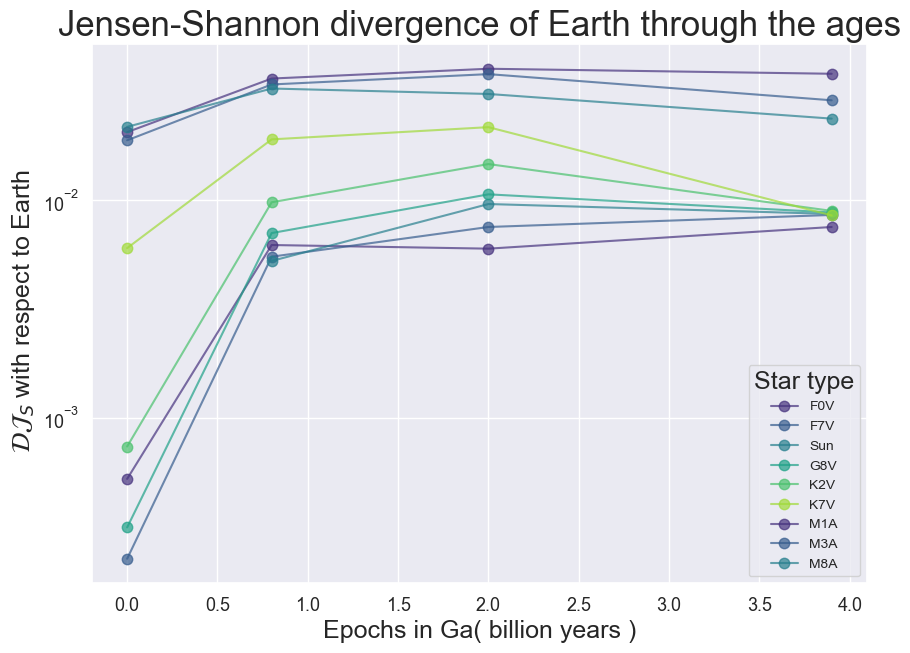

<Figure size 640x480 with 0 Axes>

In [9]:

#compute the DJs for each planet relative to our modern Earth 
import seaborn as sns
years = [0, 0.8, 2, 3.9]
#plot using sns of seaborn
#Setting up the plot space
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette("viridis")

#plotting various spectral classes with respect to earth on a single plot
plt.plot(years, DJs_df['F0V'], label='F0V', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['F7V'], label='F7V', marker='.', markersize=15, alpha=0.7)
plt.plot(years[1:], DJs_df['Sun'][1:], label='Sun', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['G8V'], label='G8V', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['K2V'], label='K2V', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['K7V'], label='K7V', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['M1A'], label='M1A', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['M3A'], label='M3A', marker='.', markersize=15, alpha=0.7)
plt.plot(years, DJs_df['M8A'], label='M8A', marker='.', markersize=15, alpha=0.7)

#Setting up the plot labels
plt.xlabel('Epochs in Ga( billion years )', fontsize=18)
plt.ylabel(r' $\mathcal{DJ}_{S}$ with respect to Earth', fontsize=18)
plt.title('Jensen-Shannon divergence of Earth through the ages', fontsize=25)
plt.yscale('log')
plt.legend(title='Star type', fontsize=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#Setting up the plot size
plt.gcf().set_size_inches(10, 7)
plt.show()

#Saving the plot
plt.savefig('earth_through_the_ages.png')

<a id="Djsplotbokeh"></a>
### 9.Plotted the same with Bokeh as it gives interactive plot hence becomes easier to interpret

<a href="#Content"> Back to contents</a>
***

In [10]:
#Importing Bokeh libraries
from bokeh.plotting import figure, show
from bokeh.io import push_notebook,output_notebook,show  # Import the export_png function
from bokeh.palettes import viridis
output_notebook()

#Importing matplotlib inline to see plot inside jupiter notebook
%matplotlib inline


#Preparing data for Bokeh plot
years = [0, 0.8, 2, 3.9]
star_types = ['F0V', 'F7V', 'Sun', 'G8V', 'K2V', 'K7V', 'M1A', 'M3A', 'M8A']

#Creating a figure object
p = figure(
    width=800,
    height=500,
    x_axis_label='Epochs in Ga (billion years)',
    y_axis_label=r'DJs with respect to Earth',  # Use raw string

    title='Jensen-Shannon Divergence of Earth Through the Ages',
    y_axis_type='log'
)

#Add lines for each star type using viridis palette
palette = viridis(len(star_types))
for i, (star_type, DJs) in enumerate(DJs_df.items()):  # Use star_type as the variable name
    line = p.line(
        x=years,  # Explicitly specify x and y values
        y=DJs,
        line_width=2,
        color=palette[i],
        alpha=0.7,
        legend_label=star_type,
    )


#Customize plot elements
p.xaxis.major_label_text_font_size = "13pt"
p.yaxis.major_label_text_font_size = "13pt"
p.title.text_font_size = "20pt"
p.legend.title = "Star type"
p.legend.label_text_font_size = "10pt"
p.legend.title_text_font_size = "10pt"
p.legend.title_text_font_style = "bold"

#Showing the plot
show(p)


Loading BokehJS ...

<a id="Djsdensityfn"></a>
### 10.Jensen-Shannon density formula:
#### We are using it as it is relative so returns many distance values hence we can work with the wavelengths.

<img src = "DJs_dens.png">

<a href="#Content"> Back to contents</a>
***

In [11]:
#Calculating DJs_Density
#DJs density is the summand of DJs
def DJs_dens(h1,h2):
    #compute modal fractions
    p, q = h1/sum(h1), h2/sum(h2)
    r = 1/2 * (p+q)
    #Important thing to note that we are not taking sum here at the denominator
    Djs_dens = 1/2 * p*np.log(p/r) + 1/2 * q*np.log(q/r)
    
    return Djs_dens

<a id="DJsdensityearth"></a>
### 11.Finding out<h1 style="color:violet; font-size: 30px;">dJS density taking Earth  </h1> at present epoch

<a href="#Content"> Back to contents</a>
***

In [12]:
#Declaring function for calculating Jensen–Shannon divergence density
earth = df['Sun']['0.0Ga']
#Storing the values of earth at present epoch in earth
DJs_dens_df = df.map(lambda spec: DJs_dens(spec,earth))
#Storing into datarame and exporting to excel file DJs_dens.xlsx
DJs_dens_df.to_excel("DJs_dens.xlsx")

<a id="nearmax"></a>
### 12.Defining a function `near_max` to find out the max value out of a nearest wavelength value

<a href="#Content"> Back to contents</a>
***

In [13]:
#Defining the function to find the maximum value of DJs_dens
#The function takes three inputs
    #1. arr: The array of DJs_dens
    #2. value: The value of wavelength location at which we want to find the maximum value
    #3. cname: The column name of the star type

def near_max(arr, value, cname):
    arr = np.asarray(arr)
    i = (np.abs(arr - value)).argmin()  #Returns the index of the minimum difference value
    max=-1  #Initializing the maximum value to a negative value as wavelength cannot be negative
    for j in epoch:
        if max<DJs_dens_df[cname][j][i]:
            max=DJs_dens_df[cname][j][i]
    max+=0.0001 #Adding a small value to the maximum value to make it visible on the plot
    return max

<a id="DJsdensityearthplot"></a>
### 13.Plotting subplots using Matplotlib
 - `24 plots in all`
 - `Djs density vs Wavelength plot`
 - `Plots divided into three wavelength ranges`
 > 1. 1-2 um
 > 2. 2-5 um
 > 3. 5-20 um

 <a href="#Content"> Back to contents</a>
 ***

C:\Users\opoda\AppData\Local\Temp\ipykernel_6432\1191196105.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[i,k].plot(lambda_new[lim[k][0]:lim[k][1]], DJs_dens_df[star_types[i]][j][lim[k][0]:lim[k][1]], color=color[j],label=lab[j])


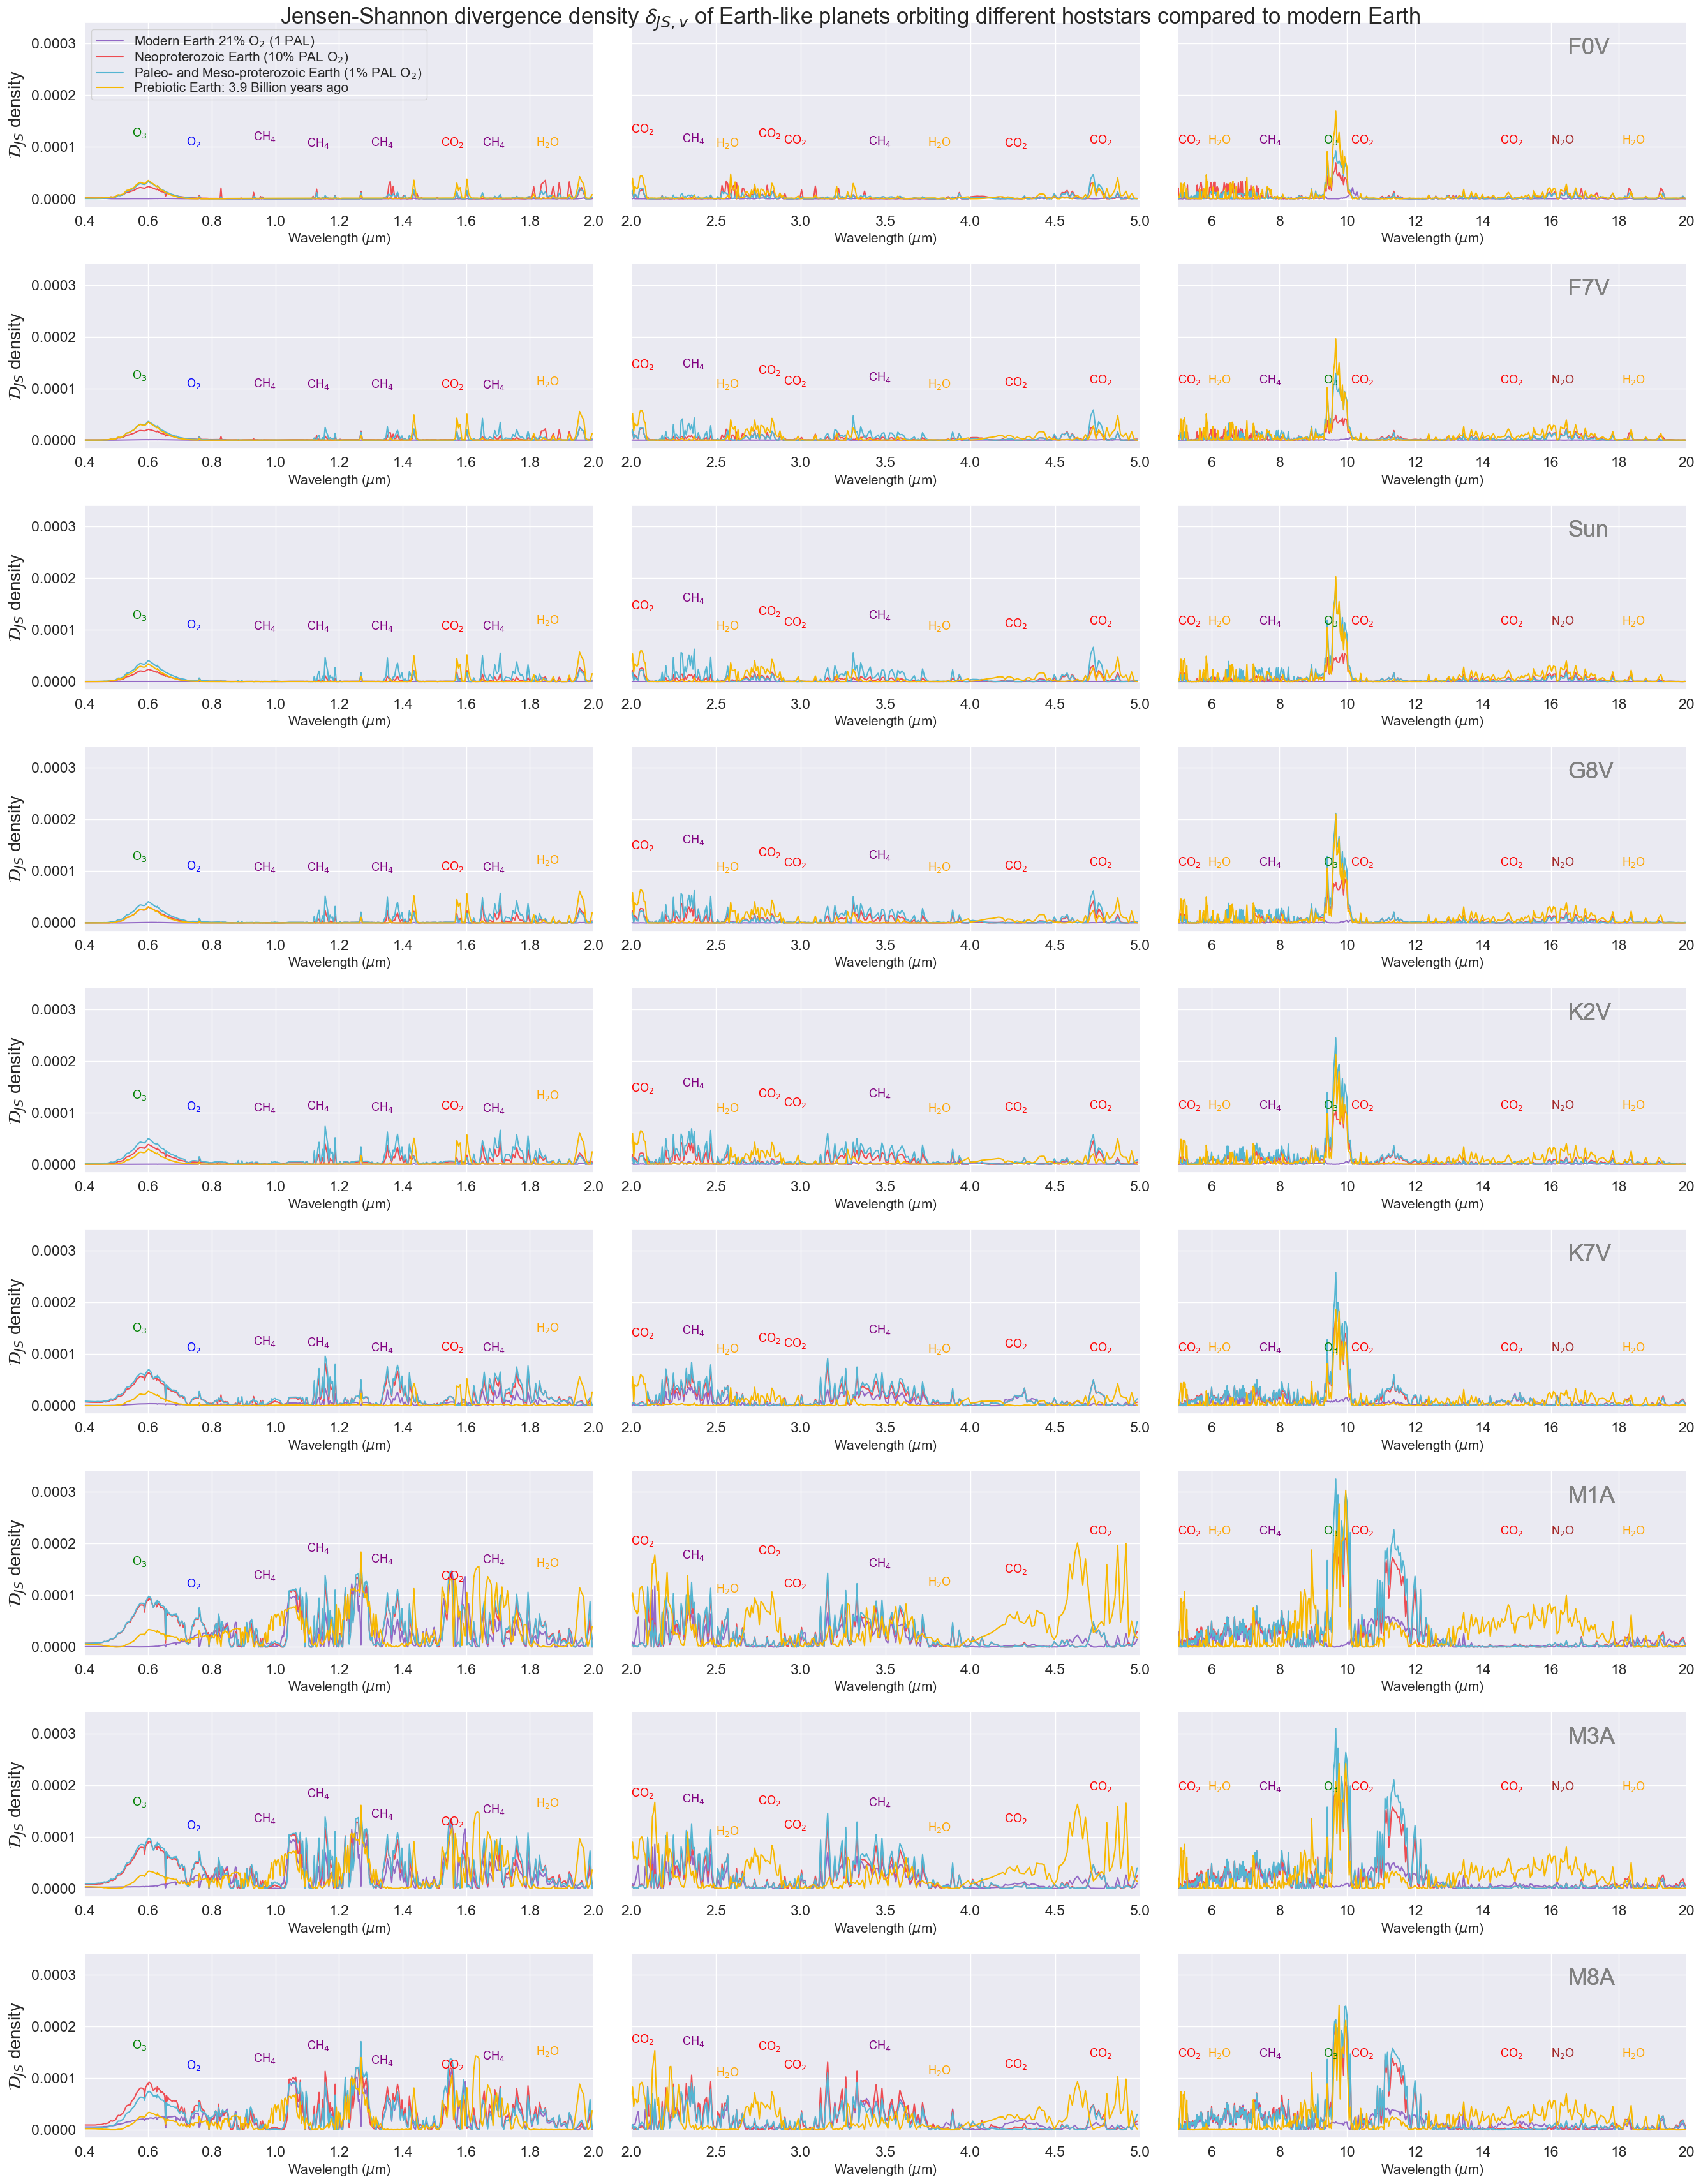

In [16]:
#Deciding layout of subplots
fig, axs = plt.subplots(9, 3, sharey=True, tight_layout=True)

#Setting the x limits for the subplots
for x in range(9):
    axs[x,0].set_xlim([0.4,2.0])
    axs[x,1].set_xlim([2.0,5.0])
    axs[x,2].set_xlim([5.0,20.0])
    
#Determining the range of data to be plotted in each section        
lim_x1 = [0,(np.abs(lambda_new - 2.0)).argmin() ]
lim_x2 = [(np.abs(lambda_new - 2.0)).argmin(), (np.abs(lambda_new - 5.0)).argmin()]
lim_x3 = [(np.abs(lambda_new - 5.0)).argmin(), (np.abs(lambda_new - 20.0)).argmin()]
lim=[lim_x1,lim_x2,lim_x3]

#Determinig the size of plot in inches
plt.gcf().set_size_inches(27, 35)

#Soring the necessary solour codes and labels
color= ['#9369C6', '#EE4C52', '#54B5D2', '#F7B801']
lab=['Modern Earth 21% O$_2$ (1 PAL)','Neoproterozoic Earth (10% PAL O$_2$)','Paleo- and Meso-proterozoic Earth (1% PAL O$_2$)','Prebiotic Earth: 3.9 Billion years ago']


#Plotting the data
#The loop is divided into three sections
#k is for y values and limits of lim array
#i is for x values of wavelength and plotting names by finding respective star types
#j is for the four different epochs and colors and labels
for k in range(3):
    for i in range(9):
        #Setting up the plot labels
        axs[i,0].set_ylabel(r'$\mathcal{D}_{JS}$ density', fontsize='20')
        axs[i,2].text(16.5,2.8e-4,star_types[i], fontsize='x-large', c='gray')
        axs[i,k].set_xlabel(r'Wavelength ($\mu$m)', fontsize='15')
        for j in range(4):

        #This single line of code plots all the 24 graphs
            axs[i,k].plot(lambda_new[lim[k][0]:lim[k][1]], DJs_dens_df[star_types[i]][j][lim[k][0]:lim[k][1]], color=color[j],label=lab[j])
        
        '''Printing the names of the molecules at the respective wavelengths and
        respective y values by parsing through near_max function'''
        if(k==0):
            axs[i,0].text(0.55, near_max(lambda_new,0.55,star_types[i]) , r'O$_3$',fontsize='13', c='green')
            axs[i,0].text(0.72, near_max(lambda_new,0.72,star_types[i]), r'O$_2$',fontsize='13', c='blue')
            axs[i,0].text(0.93, near_max(lambda_new,0.93,star_types[i]), r'CH$_4$',fontsize='13', c='purple')
            axs[i,0].text(1.1, near_max(lambda_new,1.1,star_types[i]), r'CH$_4$',fontsize='13', c='purple')
            axs[i,0].text(1.3, near_max(lambda_new,1.3,star_types[i]), r'CH$_4$',fontsize='13', c='purple')
            axs[i,0].text(1.52, near_max(lambda_new,1.52,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,0].text(1.65, near_max(lambda_new,1.62,star_types[i]), r'CH$_4$',fontsize='13', c='purple')
            axs[i,0].text(1.82, near_max(lambda_new,1.82,star_types[i]), r'H$_2$O',fontsize='13', c='orange')
        elif(k==1):
            axs[i,1].text(2.0, near_max(lambda_new,2.0,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,1].text(2.3,near_max(lambda_new,2.3,star_types[i]) , r'CH$_4$',fontsize='13', c='purple')
            axs[i,1].text(2.5, near_max(lambda_new,2.5,star_types[i]), r'H$_2$O',fontsize='13', c='orange')
            axs[i,1].text(2.75, near_max(lambda_new,2.75,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,1].text(2.9, near_max(lambda_new,2.9,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,1].text(3.4, near_max(lambda_new,3.4,star_types[i]), r'CH$_4$',fontsize='13', c='purple')
            axs[i,1].text(3.75, near_max(lambda_new,3.75,star_types[i]), r'H$_2$O',fontsize='13', c='orange')
            axs[i,1].text(4.2, near_max(lambda_new,4.2,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,1].text(4.7, near_max(lambda_new,4.7,star_types[i]), r'CO$_2$',fontsize='13', c='red')
        else:
            axs[i,2].text(5.0, near_max(lambda_new,4.7,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,2].text(5.9, near_max(lambda_new,4.7,star_types[i]), r'H$_2$O',fontsize='13', c='orange')
            axs[i,2].text(7.4, near_max(lambda_new,4.7,star_types[i]), r'CH$_4$',fontsize='13', c='purple')
            axs[i,2].text(9.3, near_max(lambda_new,4.7,star_types[i]), r'O$_3$',fontsize='13', c='green')
            axs[i,2].text(10.1, near_max(lambda_new,4.7,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,2].text(14.5, near_max(lambda_new,4.7,star_types[i]), r'CO$_2$',fontsize='13', c='red')
            axs[i,2].text(16, near_max(lambda_new,4.7,star_types[i]), r'N$_2$O',fontsize='13', c='brown')
            axs[i,2].text(18.1, near_max(lambda_new,4.7,star_types[i]), r'H$_2$O',fontsize='13', c='orange')
#Setting up the legend
axs[0,0].legend(loc='upper left', frameon='False', fontsize=15, facecolor='None', labelspacing=0.1)
#plotting title
fig.suptitle('Jensen-Shannon divergence density $\mathcal{δ}_{JS,v}$ of Earth-like planets orbiting different hoststars compared to modern Earth', fontsize=25)
#Saving the image as png
plt.savefig('Djs_density.png')

<a id="DJsdensityM8A"></a>
### 14.Our earth modelled around an **M8A star** relative to three different comparison earth models.

<a href="#Content"> Back to contents</a>
***



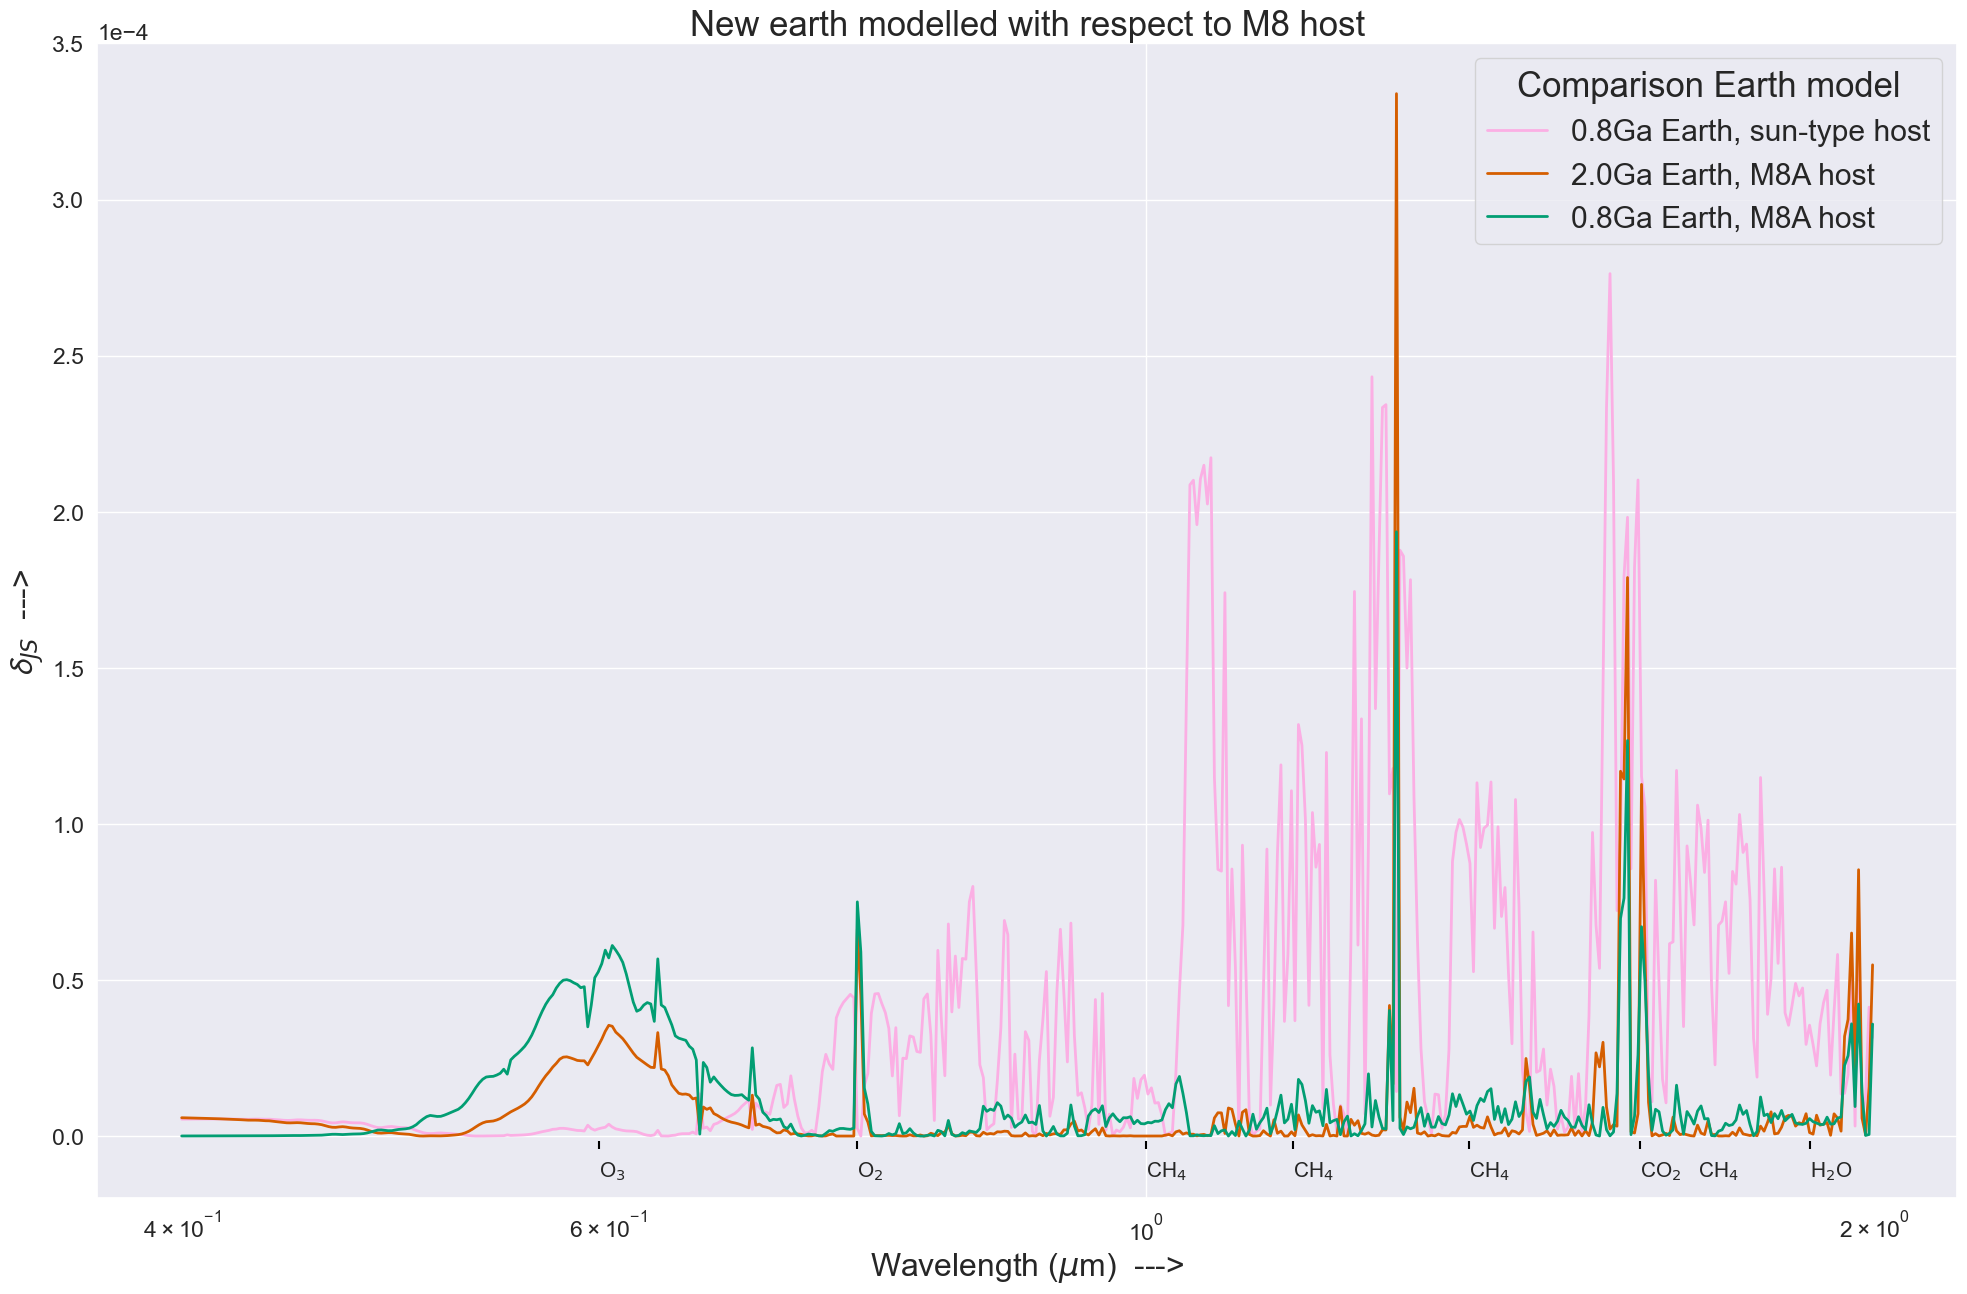

In [15]:
#Creating a single plot
#Fixing the plot size
fig, ax = plt.subplots(figsize=(24,15))

#Setting up the plot labels and ranges
spec= df['M8A']['0.0Ga'][0:484]
earth = df['Sun']['0.8Ga'][0:484]

#Parsing value to the function DJs_dens and saving to excel file
DJs_dens_df1=pd.DataFrame(DJs_dens(spec,earth))
DJs_dens_df1.to_excel("DJs_dens1.xlsx")

hostM8A2=df['M8A']['2.0Ga'][0:484]
DJs_dens_df2=pd.DataFrame(DJs_dens(spec,hostM8A2))
DJs_dens_df2.to_excel("DJs_dens2.xlsx")

hostM8A08=df['M8A']['0.8Ga'][0:484]
DJs_dens_df3=pd.DataFrame(DJs_dens(spec,hostM8A08))
DJs_dens_df3.to_excel("DJs_dens3.xlsx")

#Plotting the values with respect to resampled wavelength from 0.4 to 2.0 um
ax.plot(lambda_new[lim[0][0]:lim[0][1]], DJs_dens_df1,
        label='0.8Ga Earth, sun-type host', linewidth=2,        #Host 0.8Ga Earth, sun-type host
        color=sns.color_palette('colorblind')[6])

ax.plot(lambda_new[lim[0][0]:lim[0][1]], DJs_dens_df2,
        label='2.0Ga Earth, M8A host', linewidth=2,             #Host 2.0Ga Earth, M8A host
        color=sns.color_palette('colorblind')[3])

ax.plot(lambda_new[lim[0][0]:lim[0][1]], DJs_dens_df3,
        label='0.8Ga Earth, M8A host', linewidth=2,             #Host 0.8Ga Earth, M8A host
        color=sns.color_palette('colorblind')[2])

#Setting up the legend,title and labels
ax.legend(title='Comparison Earth model',title_fontproperties={'size':25}, fontsize='large')

plt.title('New earth modelled with respect to M8 host', fontsize=25)
ax.set_ylabel('$\mathcal{\delta}_{JS}$  --->', fontsize=23)
ax.set_xlabel('Wavelength ($\mu$m)  --->', fontsize=23)
ax.set_xscale('log')

#As the graph was getting out of bound so had to set ylim
plt.ylim([-2e-5, 3.5e-4])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

#Placing the text and marekers at the respective wavelengths
ax.text((0.74+0.45)/2, -1.3e-5, r'O$_3$', fontsize='small')
ax.scatter((0.74+0.45)/2, -0.3e-5, marker='|', color='black')
ax.text(0.76, -1.3e-5, r'O$_2$', fontsize='small')
ax.scatter(0.76, -0.3e-5, marker='|', color='black')
ax.text(1.00, -1.3e-5, r'CH$_4$', fontsize='small')
ax.scatter(1.00, -0.3e-5, marker='|', color='black')
ax.text(1.15, -1.3e-5, r'CH$_4$', fontsize='small')
ax.scatter(1.15, -0.3e-5, marker='|', color='black')
ax.text(1.36, -1.3e-5, r'CH$_4$', fontsize='small')
ax.scatter(1.36, -0.3e-5, marker='|', color='black')
ax.text(1.69, -1.3e-5, r'CH$_4$', fontsize='small')
ax.text(1.6,-1.3e-5, r'CO$_2$', fontsize='small')
ax.scatter(1.6, -0.3e-5, marker='|', color='black')
ax.text(1.88, -1.3e-5, r'H$_2$O', fontsize='small')
ax.scatter(1.88, -0.3e-5, marker='|', color='black')

# `The End   :   Thank you`
# ========================================
<a href="#Content"> Back to contents</a>
***

